In [1045]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
SEED = 17

In [924]:
df = pd.read_excel(r'C:\Users\stasv\hacknchange\hackaton_data_5post.xlsx', sep=',')

In [925]:
df=df.drop(['Unnamed: 0','ADDRESS'],axis=1)

In [926]:
df.head()

,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,NaN,остановка,423321
1,КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,NaN,остановка,423321
2,КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,NaN,NaN,423321
3,КАЛУГА,Калужская область,3.0,2.2,0.0,12.0,1.0,7162.0,10099,3257,324698,0,0,NaN,NaN,423321
4,КАЛУГА,Калужская область,1.0,2.0,0.0,9.0,1.0,6269.0,10096,3195,324698,1,0,NaN,остановка,423321


In [927]:
df['Postamat_trend'].value_counts()

0.0    47
1.0    25
Name: Postamat_trend, dtype: int64

In [928]:
df['cashbox_MAX'].value_counts()

5.0     22
6.0     18
7.0     17
8.0     14
9.0     12
4.0     11
2.0     11
3.0     11
11.0    10
12.0     7
10.0     7
13.0     6
14.0     2
19.0     1
1.0      1
15.0     1
16.0     1
18.0     1
Name: cashbox_MAX, dtype: int64

In [929]:
# Посмотрим на пропущенные значения
df.isna().mean()

CITY                       0.000000
REGION                     0.000000
Postamat_daily             0.827338
cashbox_daily              0.633094
Postamat_trend             0.827338
cashbox_MAX                0.633094
cashbox_trend              0.664269
hh_500                     0.002398
value1                     0.000000
value2                     0.000000
POPULATION                 0.000000
NEAR_Malls                 0.000000
NEAR_Business_centers      0.000000
NEAR_metro_rjd             0.976019
NEAR_Stations              0.779376
macro_salary_avg_yearly    0.000000
dtype: float64

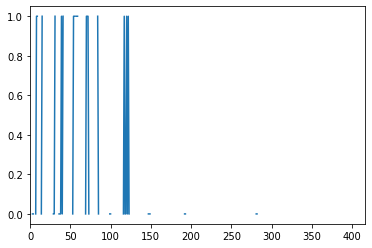

In [930]:
df.Postamat_trend.plot()

In [931]:
df.Postamat_trend.value_counts()

0.0    47
1.0    25
Name: Postamat_trend, dtype: int64

In [932]:
df.cashbox_MAX.replace(to_replace=[0], value=int(-1), inplace=True)
df.Postamat_trend.replace(to_replace=[0], value=int(-1), inplace=True)
df.fillna(value = {'NEAR_metro_rjd':0, 'NEAR_Stations':0}, inplace=True)
df.replace(to_replace=['остановка'], value=int(1), inplace=True)
df.replace(to_replace=['автостанция'], value=int(2), inplace=True)
df.head()

,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,0.0,1,423321
1,КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,0.0,1,423321
2,КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,0.0,0,423321
3,КАЛУГА,Калужская область,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,3257,324698,0,0,0.0,0,423321
4,КАЛУГА,Калужская область,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,3195,324698,1,0,0.0,1,423321


In [933]:
df['NEAR_Stations'].value_counts()

0    325
1     90
2      2
Name: NEAR_Stations, dtype: int64

In [934]:
df.describe()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
count,72.000000,153.000000,72.000000,153.000000,140.000000,416.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.416667,1.362745,-0.305556,7.156863,0.892857,2551.600962,10006.038369,2808.601918,147402.803357,0.103118,0.035971,0.023981,0.225420,404089.705036
std,1.275445,0.899699,0.958856,3.509606,0.310405,1963.959893,57.084102,202.017409,175342.903452,0.304478,0.186442,0.153173,0.429698,17786.448797
min,1.000000,0.200000,-1.000000,1.000000,0.000000,0.000000,9911.000000,2231.000000,119.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
25%,2.000000,0.700000,-1.000000,5.000000,1.000000,1001.500000,9956.000000,2670.000000,11288.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
50%,2.000000,1.200000,-1.000000,7.000000,1.000000,2165.000000,9999.000000,2781.000000,55282.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
75%,3.000000,1.900000,1.000000,9.000000,1.000000,3558.750000,10056.000000,2928.000000,324698.000000,0.000000,0.000000,0.000000,0.000000,423321.000000
max,7.000000,4.800000,1.000000,19.000000,1.000000,9775.000000,10100.000000,3484.000000,482873.000000,1.000000,1.000000,1.000000,2.000000,423321.000000


In [935]:
df.columns

Index(['CITY', 'REGION', 'Postamat_daily', 'cashbox_daily', 'Postamat_trend',
       'cashbox_MAX', 'cashbox_trend', 'hh_500', 'value1', 'value2',
       'POPULATION', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd',
       'NEAR_Stations', 'macro_salary_avg_yearly'],
      dtype='object')

In [936]:
df.head()

,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,0.0,1,423321
1,КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,0.0,1,423321
2,КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,0.0,0,423321
3,КАЛУГА,Калужская область,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,3257,324698,0,0,0.0,0,423321
4,КАЛУГА,Калужская область,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,3195,324698,1,0,0.0,1,423321


In [937]:
num_cols = [
    'Postamat_trend',
    'cashbox_MAX',
    'cashbox_trend',
    'hh_500',
    'value1',
    'value2',
    'POPULATION',
    'NEAR_Malls',
    'NEAR_Business_centers',
    'NEAR_metro_rjd',
    'NEAR_Stations',
    'macro_salary_avg_yearly'
]

cat_cols = [
    'CITY',
    'REGION',
]

target_col = ['Postamat_daily',
              'cashbox_daily']

cols = num_cols + cat_cols + target_col

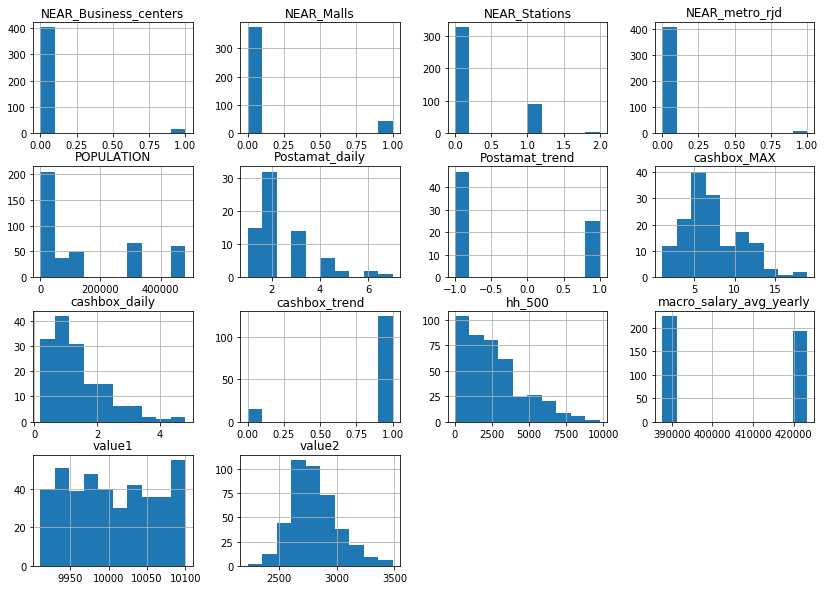

In [848]:
df.hist(column=num_cols+cat_cols+target_col, figsize=(14, 10))
None

In [938]:
df.REGION.value_counts().count()

2

In [939]:
df.CITY.value_counts().count()

110

In [940]:
df['NEAR_Stations']=df['NEAR_Stations'].astype('int64')
df['NEAR_metro_rjd']=df['NEAR_metro_rjd'].astype('int64')
df['CITY']=df['CITY'].astype('object')
df['REGION']=df['REGION'].astype('object')

In [941]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

D:\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
Postamat_daily,1,0.41,0.22,0.45,nan,0.32,0.35,0.42,0.37,0.19,-0.014,-0.056,0.0038,-0.092
cashbox_daily,0.41,1,0.2,0.82,0.22,0.45,0.36,0.43,0.34,0.3,0.41,-0.089,0.15,0.31
Postamat_trend,0.22,0.2,1,0.28,nan,0.26,0.072,0.0091,0.2,-0.039,0.14,-0.12,0.12,0.011
cashbox_MAX,0.45,0.82,0.28,1,0.22,0.4,0.27,0.34,0.21,0.16,0.18,-0.1,0.11,0.25
cashbox_trend,nan,0.22,nan,0.22,1,0.13,0.15,0.16,-0.12,0.052,-0.058,-0.15,0.0037,0.02
hh_500,0.32,0.45,0.26,0.4,0.13,1,0.19,0.45,0.52,0.22,0.21,-0.051,0.22,-0.061
value1,0.35,0.36,0.072,0.27,0.15,0.19,1,0.86,0.058,0.15,0.043,-0.097,0.089,0.22
value2,0.42,0.43,0.0091,0.34,0.16,0.45,0.86,1,0.23,0.29,0.11,-0.038,0.22,0.095
POPULATION,0.37,0.34,0.2,0.21,-0.12,0.52,0.058,0.23,1,0.24,0.15,0.013,0.4,-0.077
NEAR_Malls,0.19,0.3,-0.039,0.16,0.052,0.22,0.15,0.29,0.24,1,0.19,-0.0016,0.23,-0.076


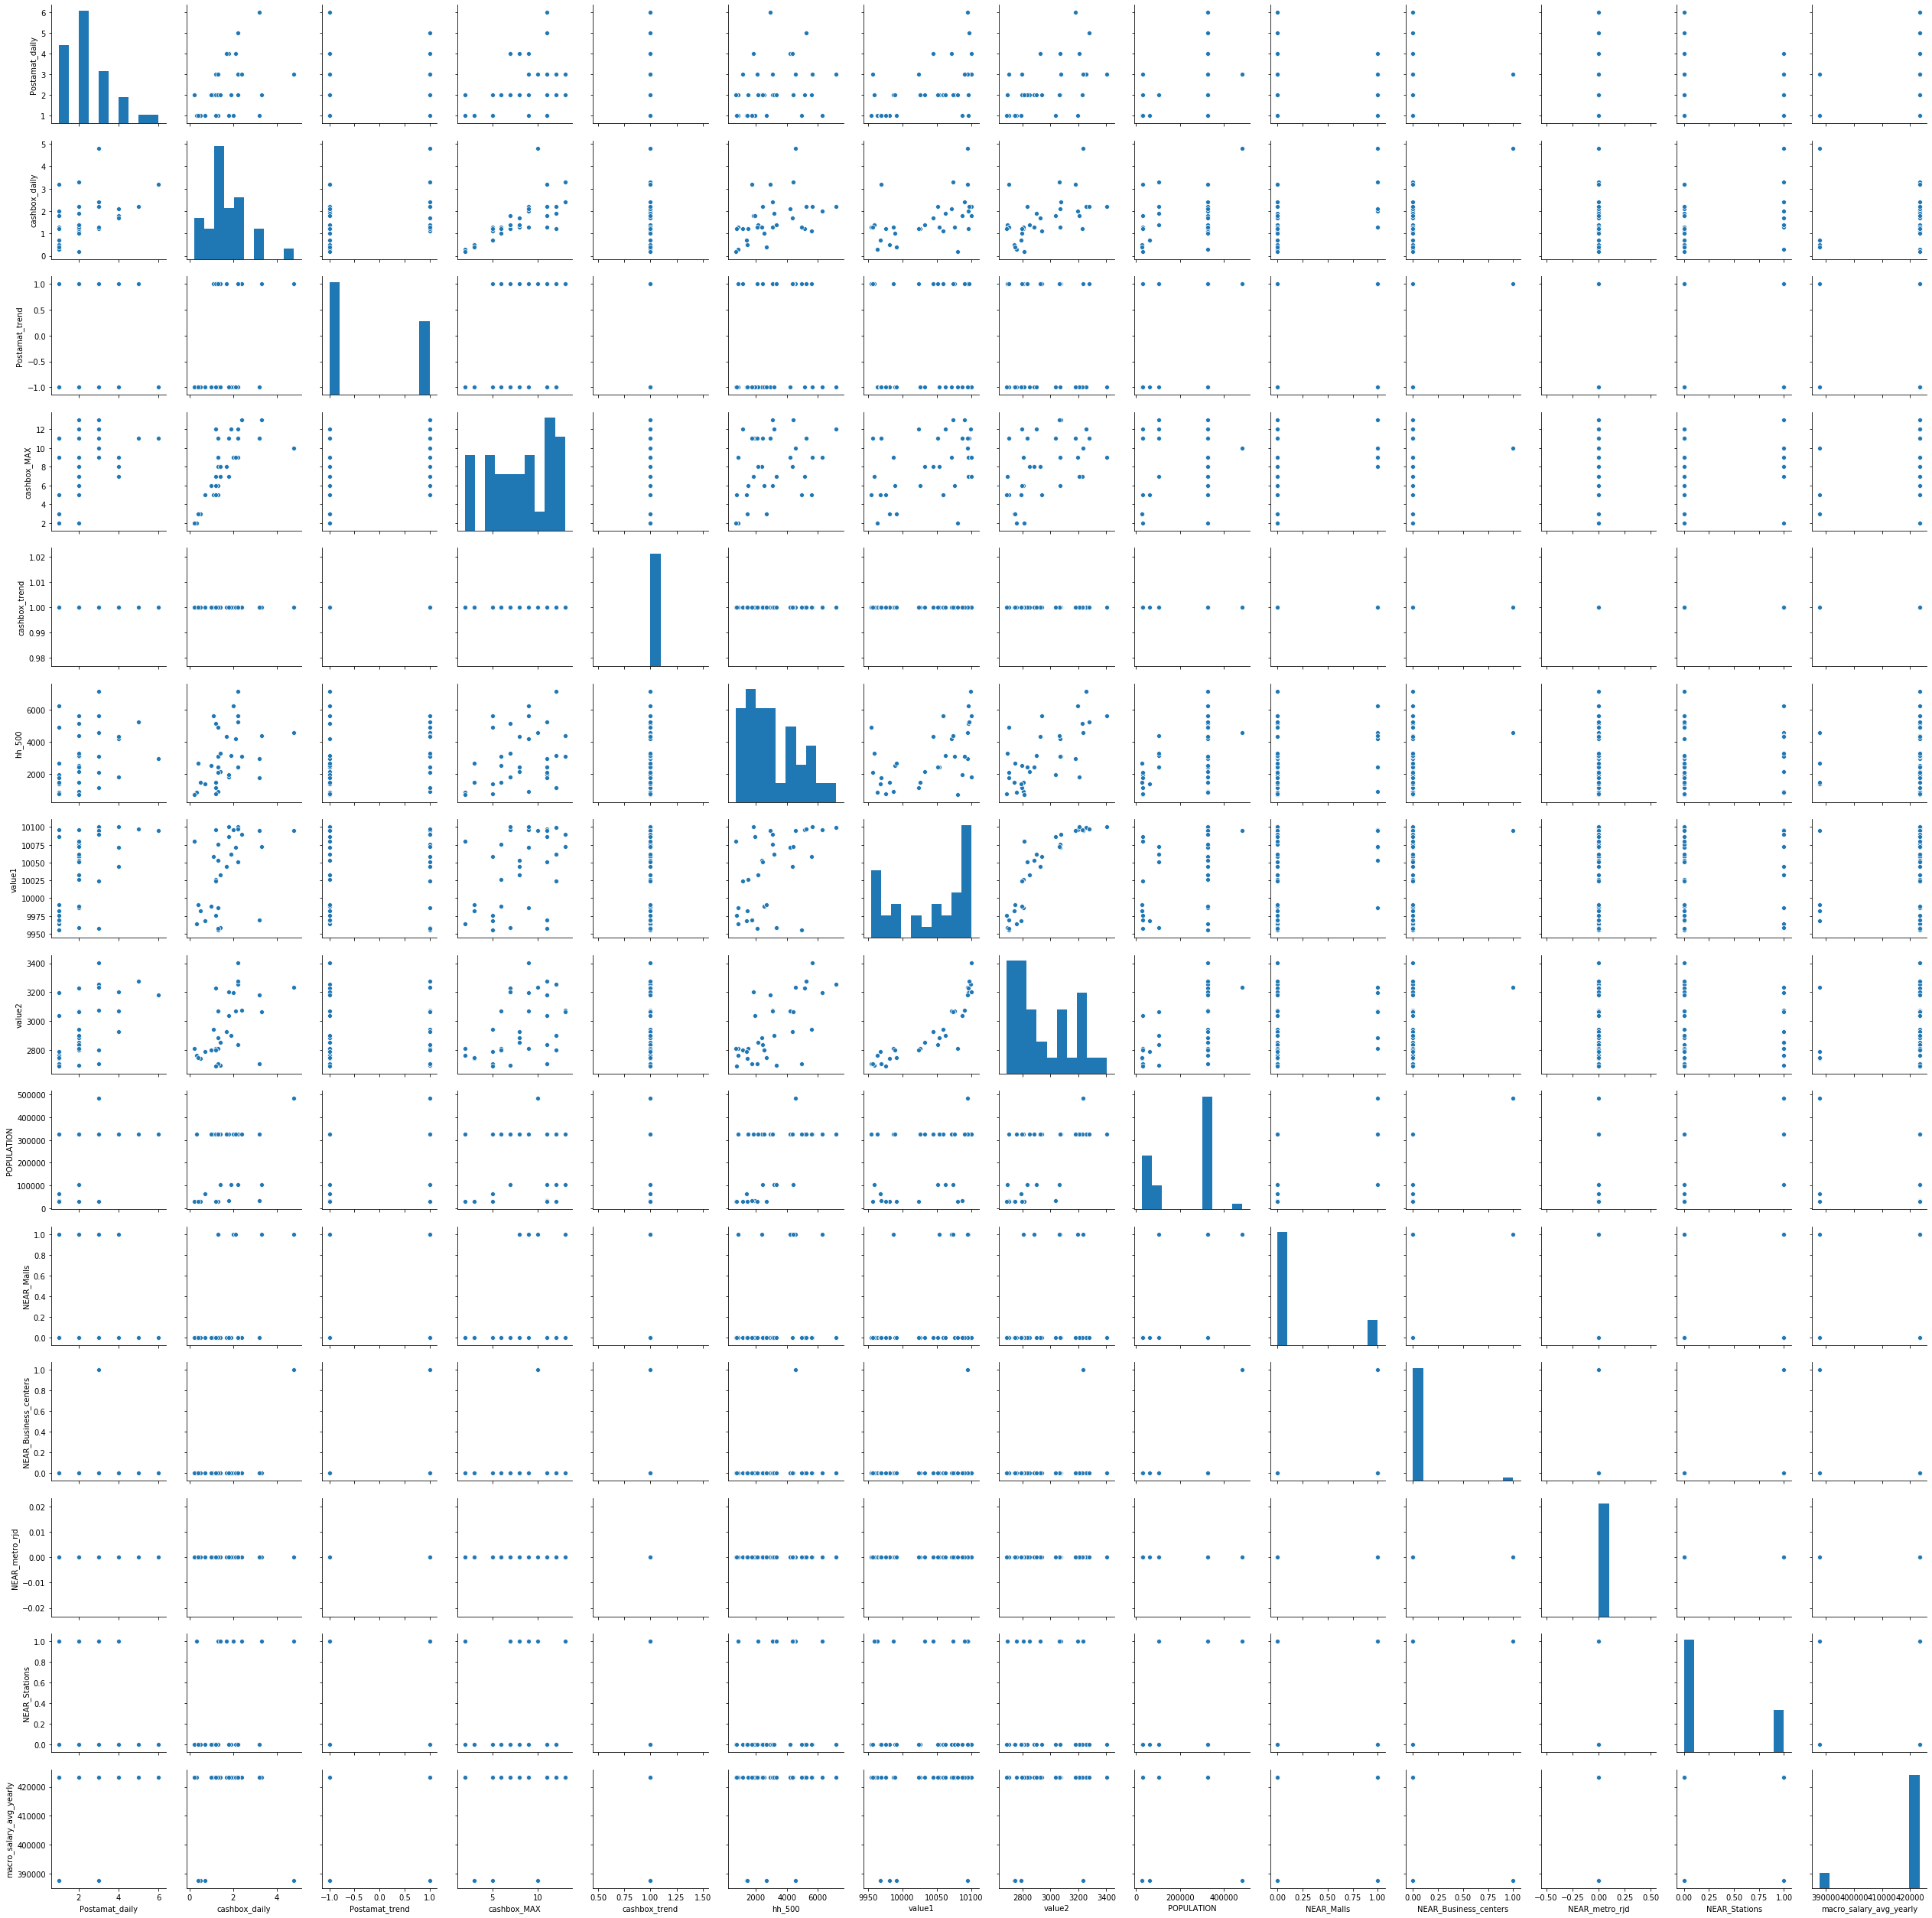

In [853]:
import seaborn as sns
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df.dropna());

In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 16 columns):
CITY                       417 non-null object
REGION                     417 non-null object
Postamat_daily             72 non-null float64
cashbox_daily              153 non-null float64
Postamat_trend             72 non-null float64
cashbox_MAX                153 non-null float64
cashbox_trend              140 non-null float64
hh_500                     416 non-null float64
value1                     417 non-null int64
value2                     417 non-null int64
POPULATION                 417 non-null int64
NEAR_Malls                 417 non-null int64
NEAR_Business_centers      417 non-null int64
NEAR_metro_rjd             417 non-null int64
NEAR_Stations              417 non-null int64
macro_salary_avg_yearly    417 non-null int64
dtypes: float64(6), int64(8), object(2)
memory usage: 52.2+ KB


In [1046]:
df.head()

,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,0,1,423321
1,КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,0,1,423321
2,КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,0,0,423321
3,КАЛУГА,Калужская область,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,3257,324698,0,0,0,0,423321
4,КАЛУГА,Калужская область,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,3195,324698,1,0,0,1,423321


In [1284]:
dff_city = df.replace(to_replace=list(df.CITY.value_counts().index), value=[str(i) for i in range(110)]).copy()
dff_city = df.copy()
dff_city = pd.concat([dff_city, pd.get_dummies(dff_city.REGION).rename(columns={"Калужская область": "K", "Тульская область": "T"})], axis=1).copy()
dff_city.replace(to_replace=list(df.CITY.value_counts().index), value=[str(i) for i in range(110)], inplace=True)
dff_city = pd.concat([dff_city, pd.get_dummies(dff_city.CITY, prefix='CITY', prefix_sep='_')], axis=1).copy()
dff_city = dff_city.drop(columns=['REGION'], axis=1)
dff_city = dff_city.drop(columns=['CITY'], axis=1)
dff_city.head()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,...,CITY_90,CITY_91,CITY_92,CITY_93,CITY_94,CITY_95,CITY_96,CITY_97,CITY_98,CITY_99
0,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,...,0,0,0,0,0,0,0,0,0,0
2,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,3257,324698,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,3195,324698,1,...,0,0,0,0,0,0,0,0,0,0


In [1348]:
# dff_no_city = df.replace(to_replace=list(df.CITY.value_counts().index), value=[str(i) for i in range(110)]).copy()
dff_no_city = df.copy()
# dff_no_city = pd.concat([dff_no_city, pd.get_dummies(dff_no_city.REGION).rename(columns={"Калужская область": "K", "Тульская область": "T"})], axis=1).copy()
# dff_no_city.replace(to_replace=list(df.CITY.value_counts().index), value=[str(i) for i in range(110)], inplace=True)
# dff_no_city = pd.concat([dff_no_city, pd.get_dummies(dff_no_city.CITY, prefix='CITY', prefix_sep='_')], axis=1).copy()
dff_no_city = dff_no_city.drop(columns=['REGION'], axis=1)
dff_no_city = dff_no_city.drop(columns=['CITY'], axis=1)
dff_no_city = dff_no_city.drop(columns=['value2'], axis=1)
dff_no_city.head()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,NaN,3.3,NaN,13.0,1.0,7696.0,10099,324698,0,0,0,1,423321
1,NaN,NaN,NaN,NaN,NaN,6369.0,10068,324698,1,1,0,1,423321
2,NaN,3.1,NaN,12.0,1.0,5553.0,10100,324698,1,0,0,0,423321
3,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,324698,0,0,0,0,423321
4,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,324698,1,0,0,1,423321


In [1375]:
#city/no_city
dff = dff_no_city
dff.head()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,NaN,3.3,NaN,13.0,1.0,7696.0,10099,324698,0,0,0,1,423321
1,NaN,NaN,NaN,NaN,NaN,6369.0,10068,324698,1,1,0,1,423321
2,NaN,3.1,NaN,12.0,1.0,5553.0,10100,324698,1,0,0,0,423321
3,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,324698,0,0,0,0,423321
4,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,324698,1,0,0,1,423321


## Выделяем данные в зависимости от целевого признака

In [1350]:
df_post_test = dff[dff.isna().Postamat_daily == True].copy()
df_post_train = dff[dff.isna().Postamat_daily == False].copy()
print('post test:', df_post_test.shape[0])
print('post train:', df_post_train.shape[0])
df_post_test.head(3)

df_cashb_test = dff[dff.isna().cashbox_daily == True].copy()
df_cashb_train = dff[dff.isna().cashbox_daily == False].copy()
print('cashb test:', df_cashb_test.shape[0])
print('cashb train:', df_cashb_train.shape[0])
df_cashb_test.head()

post test: 345
post train: 72
cashb test: 264
cashb train: 153


,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
1,NaN,NaN,NaN,NaN,NaN,6369.0,10068,324698,1,1,0,1,423321
5,NaN,NaN,NaN,NaN,NaN,5023.0,10100,482873,1,0,0,1,387679
9,2.0,NaN,1.0,NaN,NaN,8732.0,10097,482873,0,0,0,1,387679
12,NaN,NaN,NaN,NaN,NaN,6686.0,10094,482873,1,0,0,1,387679
14,6.0,NaN,-1.0,NaN,NaN,4112.0,10100,482873,1,0,0,1,387679


## Postamat_daily

In [1351]:
df_post_train.head()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
3,3.0,2.2,-1.0,12.0,1.0,7162.0,10099,324698,0,0,0,0,423321
4,1.0,2.0,-1.0,9.0,1.0,6269.0,10096,324698,1,0,0,1,423321
7,3.0,2.2,-1.0,9.0,1.0,5632.0,10100,324698,0,0,0,0,423321
8,3.0,4.8,1.0,10.0,1.0,4583.0,10095,482873,1,1,0,1,387679
9,2.0,NaN,1.0,NaN,NaN,8732.0,10097,482873,0,0,0,1,387679


In [1352]:
df_post_train = df_post_train.drop(columns=['cashbox_daily','cashbox_MAX','cashbox_trend'])

In [1353]:
df_post_test.head()

,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,NaN,3.3,NaN,13.0,1.0,7696.0,10099,324698,0,0,0,1,423321
1,NaN,NaN,NaN,NaN,NaN,6369.0,10068,324698,1,1,0,1,423321
2,NaN,3.1,NaN,12.0,1.0,5553.0,10100,324698,1,0,0,0,423321
5,NaN,NaN,NaN,NaN,NaN,5023.0,10100,482873,1,0,0,1,387679
6,NaN,1.2,NaN,6.0,1.0,7703.0,10088,324698,0,0,0,1,423321


In [1354]:
df_post_test=df_post_test.drop(columns=['Postamat_trend', 'Postamat_daily','cashbox_daily','cashbox_MAX','cashbox_trend'])
df_post_test=df_post_test.dropna(subset=['hh_500'])

In [1355]:
df_post_test.head()

,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,7696.0,10099,324698,0,0,0,1,423321
1,6369.0,10068,324698,1,1,0,1,423321
2,5553.0,10100,324698,1,0,0,0,423321
5,5023.0,10100,482873,1,0,0,1,387679
6,7703.0,10088,324698,0,0,0,1,423321


In [1356]:
# # df_post_test['Postamat_trend'] = df_post_test['Postamat_trend'].astype('object')
# df_post_test['NEAR_Malls'] = df_post_test['NEAR_Malls'].astype('str')
# df_post_test['NEAR_Business_centers'] = df_post_test['NEAR_Business_centers'].astype('str')
# df_post_test['NEAR_metro_rjd'] = df_post_test['NEAR_metro_rjd'].astype('str')
# df_post_test['NEAR_Stations'] = df_post_test['NEAR_Stations'].astype('str')

# df_post_train['Postamat_trend'] = df_post_train['Postamat_trend'].astype('str')
# df_post_train['NEAR_Malls'] = df_post_train['NEAR_Malls'].astype('str')
# df_post_train['NEAR_Business_centers'] = df_post_train['NEAR_Business_centers'].astype('str')
# df_post_train['NEAR_metro_rjd'] = df_post_train['NEAR_metro_rjd'].astype('str')
# df_post_train['NEAR_Stations'] = df_post_train['NEAR_Stations'].astype('str')

# df_post_train['hh_500'] = df_post_train['hh_500'].astype('int64')
# df_post_test['hh_500'] = df_post_test['hh_500'].astype('int64')

In [1357]:
print(df_post_train.shape)
print(df_post_test.shape)

(72, 10)
(344, 8)


### X_POST

In [1358]:
X_post = df_post_train.drop('Postamat_daily', axis=1)
y_post = df_post_train['Postamat_daily']
print(X_train.shape, y_train.shape)

(72, 12) (72,)


In [1359]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_post, y_post, 
                                                                test_size=0.3, 
                                                                random_state=SEED)
print(X_train_part.shape[0], X_valid.shape[0], y_train_part.shape[0], y_valid.shape[0])

50 22 50 22


In [1360]:
# skf = KFold(n_splits=5, shuffle=True, random_state=SEED)

# knn_pipe = Pipeline([('scaler', MinMaxScaler()),
#                      ('knn', KNeighborsClassifier(weights='distance', n_jobs=-1))])

# knn_params = {'knn__n_neighbors': range(1, 16), 'knn__leaf_size': range(1, 10)}

# knn_grid = GridSearchCV(knn_pipe, knn_params,
#                         cv=skf, n_jobs=-1, verbose=True,
#                         scoring=make_scorer(mean_squared_error))

# knn_grid.fit(X_post, y_post);

In [1361]:
# knn_grid.best_estimator_

In [1362]:
# X_post['KNN'] = knn_grid.predict(X_post)

In [1363]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_post, y_post, 
                                                                test_size=0.3, 
                                                                random_state=SEED)
print(X_train_part.shape[0], X_valid.shape[0], y_train_part.shape[0], y_valid.shape[0])

50 22 50 22


In [1364]:
X_train_part.head()

,Postamat_trend,hh_500,value1,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
97,-1.0,2413.0,10053,324698,1,0,0,0,423321
123,-1.0,2127.0,9936,324698,0,0,1,1,423321
193,-1.0,859.0,9964,324698,0,0,0,1,423321
271,1.0,1167.0,10024,30392,0,0,0,0,423321
168,-1.0,2115.0,10005,482873,0,0,0,0,387679


In [1365]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = KFold(n_splits=5, shuffle=True, random_state=SEED)

cross_validate(LinearRegression(), X_train_part, y_train_part, cv=skf, 
               scoring={'mean_absolute_error': make_scorer(mean_absolute_error), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00647306, 0.00551724, 0.00400472, 0.00302148, 0.00399566]),
 'score_time': array([0.00488853, 0.00305724, 0.00530815, 0.00300169, 0.00300407]),
 'test_mean_absolute_error': array([1.15769296, 1.44607922, 1.23126834, 0.65964486, 0.81234195]),
 'test_mean_squared_error': array([2.43319583, 2.70881527, 2.29700631, 0.65154944, 1.01208292])}

In [1366]:
skf = KFold(n_splits=5, shuffle=True, random_state=SEED)

lr_pipe = Pipeline([('scaler', MinMaxScaler()),
                     ('lr', LinearRegression())])

lr_params = {'knn__n_neighbors': range(1, 16)}

lr_pipe.fit(X_train_part, y_train_part)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [1390]:
r2_score(lr_pipe.predict(X_valid), y_valid)

-0.5215038116643169

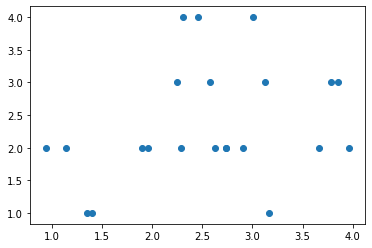

In [1368]:
plt.scatter(lr_pipe.predict(X_valid), y_valid)

In [1369]:
df_pr = pd.DataFrame({'Actual': y_valid, 'Predicted': lr_pipe.predict(X_valid)})
df_pr.head()

,Actual,Predicted
54,3.0,3.781609
119,2.0,2.902331
261,2.0,1.956819
31,3.0,3.851877
149,4.0,2.306955


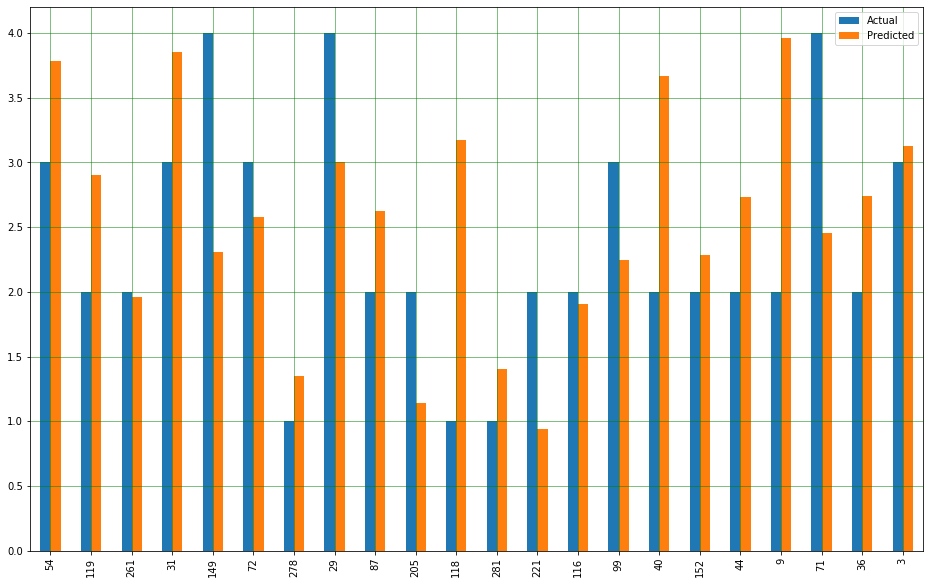

In [1370]:
df_pr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Random Forest

In [1385]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest – случайный лес
# n_estimators – количество используемых деревьев решений

rf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('rf', RandomForestClassifier(n_estimators=100,
                                                  n_jobs=-1,
                                                  random_state=SEED,
                                                  ))])

rf_params = {'rf__max_depth': range(3, 10), 'rf__max_features': range(1, 10)}

rf_grid = GridSearchCV(rf_pipe, rf_params,
                       scoring=make_scorer(r2_score),
                       cv=skf, n_jobs=-1, verbose=True)

rf_grid.fit(X_train_part, y_train_part);

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   27.4s finished


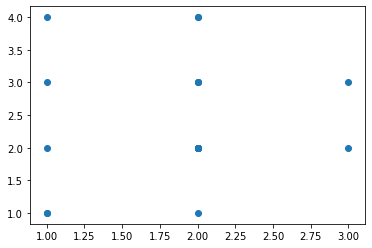

In [1388]:
plt.scatter(rf_grid.best_estimator_.predict(X_valid), y_valid)

In [1389]:
df_pr = pd.DataFrame({'Actual': y_valid, 'Predicted': rf_grid.predict(X_valid)})
df_pr.head()

,Actual,Predicted
54,3.0,3.0
119,2.0,2.0
261,2.0,1.0
31,3.0,2.0
149,4.0,2.0


In [1392]:
r2_score(rf_grid.predict(X_valid), y_valid)

-3.0965517241379317

## Нормализуем данные

In [1323]:
scaler = MinMaxScaler()
X_post_n = X_post.copy()
X_post_n[:] = scaler.fit_transform(X_post_n[:])
X_post_n.head()

,Postamat_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
3,0.0,0.731532,0.994083,0.737981,0.651894,0.0,0.0,0.0,0.0,1.0
4,0.0,0.639782,0.976331,0.663462,0.651894,1.0,0.0,0.0,1.0,1.0
7,0.0,0.574335,1.000000,0.913462,0.651894,0.0,0.0,0.0,0.0,1.0
8,1.0,0.466557,0.970414,0.711538,1.000000,1.0,1.0,0.0,1.0,0.0
9,1.0,0.892839,0.982249,0.665865,1.000000,0.0,0.0,0.0,1.0,0.0


In [1324]:
X_train_part_n, X_valid_n, y_train_part_n, y_valid_n = train_test_split(X_post_n, y_post, 
                                                                        test_size=0.3, 
                                                                        random_state=SEED)
print(X_train_part.shape[0], X_valid.shape[0], y_train_part.shape[0], y_valid.shape[0])

50 22 50 22


In [1327]:
def getCoefficients(model, X_train):
    """Returns sorted coefficient values of the model"""
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    return coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)   

from sklearn.linear_model import LassoCV
reg = LassoCV(cv=skf).fit(X_post_n, y_post)

regcoef = getCoefficients(reg, X_post_n)
print(regcoef[regcoef['coef'] == 0].count())
regcoef

coef    3
dtype: int64


,coef
value2,1.781217
POPULATION,1.121258
NEAR_Business_centers,-0.860726
NEAR_Malls,0.503934
Postamat_trend,0.466762
NEAR_Stations,-0.346406
macro_salary_avg_yearly,-0.024802
hh_500,0.000000
value1,0.000000
NEAR_metro_rjd,0.000000


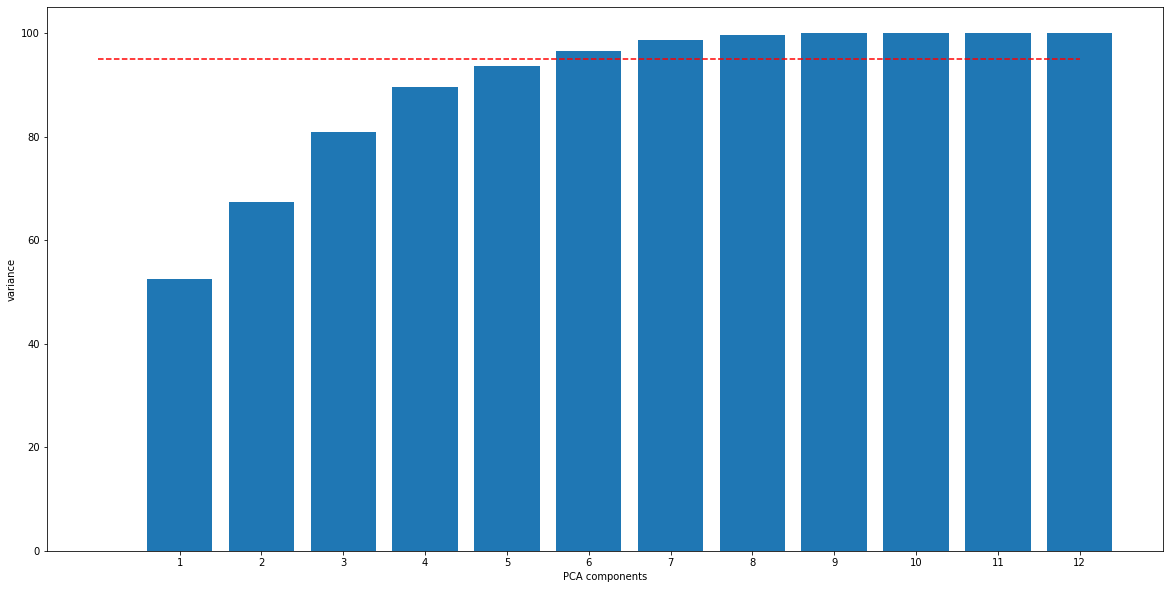

In [1253]:
def plotPCA(pca):
    """
    Plots accumulated percentage of explained variance by component
    
    pca: fitted PCA object
    """
    components = range(1, pca.n_components_ + 1)
    variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    plt.figure(figsize=(20, 10))
    plt.bar(components, variance)
    
    # additionally mark the level of 95% of explained variance 
    plt.hlines(y = 95, xmin=0, xmax=len(components), linestyles='dashed', colors='red')
    
    plt.xlabel('PCA components')
    plt.ylabel('variance')
    plt.xticks(components)
    plt.show()
    
# Create PCA object: pca

pca = PCA()

# Train PCA on scaled data

pca.fit(X_train_part_n)

# plot explained variance

plotPCA(pca)

In [1263]:
# You code here
pca_2 = PCA(n_components=6)
pca_features_train = pca.transform(X_train_part_n)
pca_features_test = pca.transform(X_valid_n)

pca_features_train_sc = scaler.fit_transform(pca.transform(X_train_part_n))
pca_features_test_sc = scaler.transform(pca.transform(X_valid_n))

In [1264]:
skf = KFold(n_splits=5, shuffle=True, random_state=SEED)

lr_pipe = Pipeline([('scaler', MinMaxScaler()),
                     ('lr', LinearRegression())])

lr_params = {'knn__n_neighbors': range(1, 16)}

lr_pipe.fit(pca_features_train_sc, y_train_part)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)